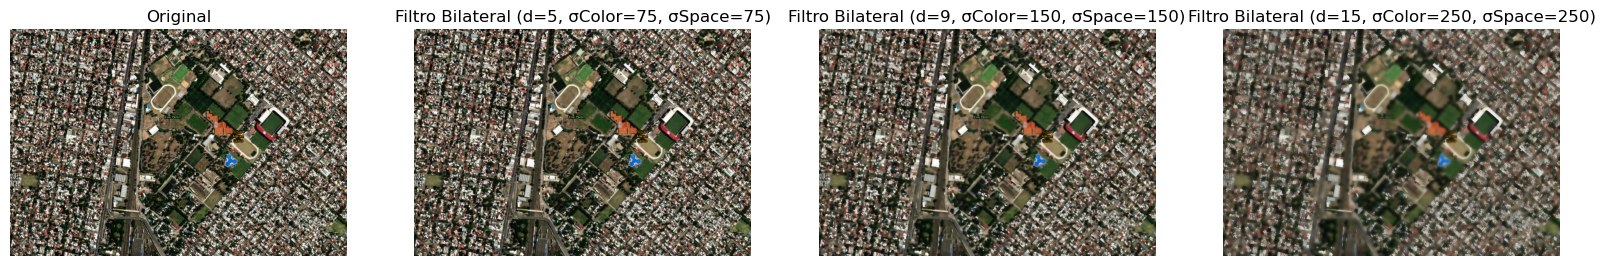

In [1]:
import cv2
import matplotlib.pyplot as plt

# Leer la imagen en color
imagen = cv2.imread("lanus.png")
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

# Aplicar filtro bilateral con diferentes parámetros
filtro1 = cv2.bilateralFilter(imagen_rgb, d=5, sigmaColor=75, sigmaSpace=75)
filtro2 = cv2.bilateralFilter(imagen_rgb, d=9, sigmaColor=150, sigmaSpace=150)
filtro3 = cv2.bilateralFilter(imagen_rgb, d=15, sigmaColor=250, sigmaSpace=250)

# Mostrar la imagen original y las imágenes filtradas
fig, axes = plt.subplots(1, 4, figsize=(20, 10))
axes[0].imshow(imagen_rgb)
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(filtro1)
axes[1].set_title("Filtro Bilateral (d=5, σColor=75, σSpace=75)")
axes[1].axis("off")

axes[2].imshow(filtro2)
axes[2].set_title("Filtro Bilateral (d=9, σColor=150, σSpace=150)")
axes[2].axis("off")

axes[3].imshow(filtro3)
axes[3].set_title("Filtro Bilateral (d=15, σColor=250, σSpace=250)")
axes[3].axis("off")

plt.show()